<h2>KNN Classification</h2>

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Load the Data</h2>
</div>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn


iris=pd.read_csv(r'C:\Users\Owner\Downloads\Machine Learning\Classification\iris.csv')

In [25]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>EDA</h2>
</div>

In [27]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [28]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<p>The standard deviation is almost 1 in each variable</p>

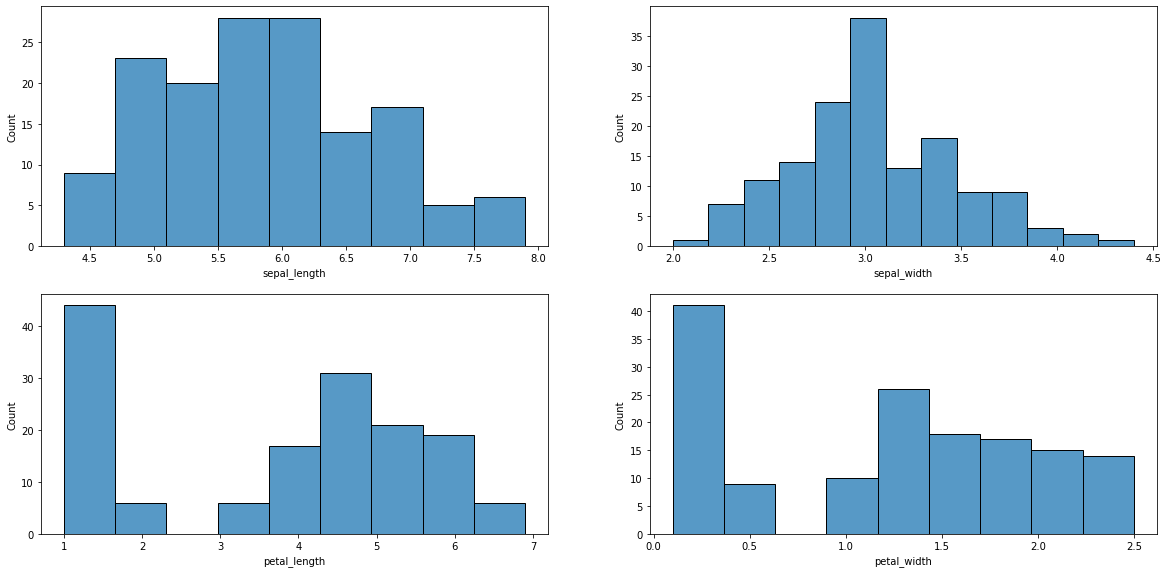

In [29]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(3,2,1)
sns.histplot(data = iris, x =  'sepal_length' ,ax = ax1)
ax1 = fig.add_subplot(3,2,2)
sns.histplot(data = iris, x =  'sepal_width' ,ax = ax1)
ax1 = fig.add_subplot(3,2,3)
sns.histplot(data = iris, x =  'petal_length' ,ax = ax1)
ax1 = fig.add_subplot(3,2,4)
sns.histplot(data = iris, x =  'petal_width' ,ax = ax1)
plt.show()

<p>Sepal Length and Width Data looks Normal</p>
<p>Petal Length and Width Data is somewhat uniform</p>

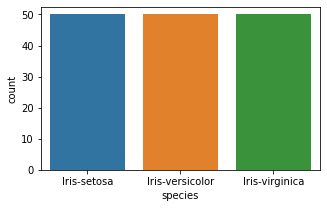

In [18]:
fig = plt.figure(figsize=(5,3))
sns.countplot(data = iris, x =  'species')
plt.show()

<p>The count of each type of flower is equal. There is no need to sample.</p>

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preparation</h2>
</div>

In [82]:
#Splitting Data into Test and Train
from sklearn.model_selection import train_test_split

X = iris.iloc[:, [0, 1, 2, 3]].values
y = iris.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1)

In [83]:
#Standardizing Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Modelling</h2>
</div>

In [84]:
#Using KNeighbour Classifier for Prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [86]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [87]:
y_test

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Accuracy and Performance</h2>
</div>

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print("Confusion Matrix: \n",cm)
print("Accuracy: ",ac)

Confusion Matrix: 
 [[5 0 0]
 [0 6 0]
 [0 0 4]]
Accuracy:  1.0
